In [2]:
import numpy as np
import cv2
import glob

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation



In [3]:

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# images = glob.glob('/home/isaac/Desktop/hover-jet/localization/chessboards/*.jpg')
images = glob.glob('/home/isaac/Desktop/hover-jet/localization/jetcam_chessboards/*.png')
for fname in images:
    img = cv2.imread(fname)
    print img.shape
#     break
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)

ret, mtx, distortion, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
dist = distortion
print distortion
print mtx

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
[[ 0.01855503  0.13617834  0.00036737  0.00710654 -0.36514252]]
[[509.55744588   0.         331.84201483]
 [  0.         512.03515271 250.87030742]
 [  0.           0.           1.        ]]


In [4]:
# jake_mtx = np.array([[1.73205, 0,       0,      0],
#                     [0, 1.73205,        0,       0],
#                     [0,       0,       -1,  -0.0002],
#                     [0,       0,       -1,       0]])[:-1,:-1]
# print np.linalg.inv(jake_mtx)
# jake_mtx = np.eye(3) * 2
mts = np.array([[509.55744588,   0.        , 331.84201483],
       [  0.        , 512.03515271, 250.87030742],
       [  0.        ,   0.        ,   1.        ]])

print distortion

[[ 0.01855503  0.13617834  0.00036737  0.00710654 -0.36514252]]


In [10]:
chess = cv2.imread('/home/isaac/Desktop/hover-jet/localization/chessboards/IMG_4118.jpg')
print chess.shape

(1512, 2016, 3)


Populating the interactive namespace from numpy and matplotlib
<aruco_Dictionary 0x7f3b4a8325d0>
(1000, 1000)
uint8


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


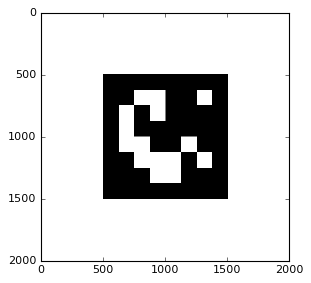

In [11]:
%pylab inline
import numpy as np
import cv2
import cv2.aruco as aruco
from matplotlib import pyplot as plt
 
'''
    drawMarker(...)
        drawMarker(dictionary, id, sidePixels[, img[, borderBits]]) -> img
'''
 
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_1000)
print(aruco_dict)
# second parameter is id number
# last parameter is total image size
img = aruco.drawMarker(aruco_dict, 21, 1000)
print img.shape
background = np.ones((2000,2000))*255
background[500:1500,500:1500] = img
img = background.astype(np.uint8)
print img.dtype
# img = aruco.drawMarker(aruco_dict, 2, 700)
cv2.imwrite("test_marker.jpg", img)
 
# plt.imshow(img)
# plt.show()
# cv2.imshow('frame',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img, cmap='gray')
plt.show()


OSError: [Errno 12] Cannot allocate memory

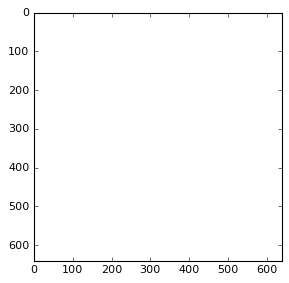

In [12]:
def find_markers(image):

    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
    parameters =  aruco.DetectorParameters_create()
    #lists of ids and the corners beloning to each id
    corners, ids, rejectedImgPoints = aruco.detectMarkers(image, aruco_dict, parameters=parameters)
    marked = aruco.drawDetectedMarkers(np.stack([image]*3, axis=-1), corners, ids, [255,255,0])
#     plt.imshow(marked, cmap='gray')
#     plt.show()
    return corners

def localize_markers(corners, gray):
    camera_mtx = mtx
    distortion_coeffs = distortion * 0
    output_image = np.stack([gray*0]*3, axis=-1)
    if corners:
        
        rs, ts, _ = aruco.estimatePoseSingleMarkers(corners, 5, camera_mtx, distortion_coeffs)
        
        for r,t in zip(rs, ts):
            output_image += aruco.drawAxis(output_image * 0,
                                        camera_mtx, distortion_coeffs, r, t, 3
                                       );
    return (output_image + np.stack([gray]*3, axis=-1) * 255).astype(np.float32) / 255 

# gray = cv2.imread('pic4.jpg',0)[:,::-1]
# gray = cv2.imread('/home/isaac/Desktop/hover-jet/localization/test_marker.jpg',0)
# print gray.dtype
# gray = cv2.imread('/home/isaac/Downloads/ARTag-with-IDs-2-3-6-34-top-set-of-images-and-AprilTag-with-IDs-4-6-8-9-bottom.png',0)
# gray = img
# gray = cv2.imread('/home/isaac/Downloads/isaac/jet_image_120.jpg',0) / 2


images = []

def movie(images):
    frames = [] # for storing the generated images
    fig = plt.figure()
    for img in images:
#         print img
        frames.append([plt.imshow(img,animated=True)])

    ani = animation.ArtistAnimation(fig, frames,
                                    interval=150, blit=True,
                                    repeat_delay=1000)
    ani.save('movie.mp4')
#     plt.show()
    
for i in range(10,385,1):
    gray = cv2.imread('/home/isaac/Downloads/isaac/jet_image_' + str(i) +'.jpg',0)
#     gray[100:200] *= 0
#     plt.imshow(gray)
#     plt.show()
    
#     break
#     print gray.shape
    if gray is not None:
        image = localize_markers(find_markers(gray), gray)
        images.append(image)
images = filter(lambda x: x is not None, images)
movie(images)

In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('movie.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                
                <source src="/home/isaac/Desktop/hover-jet/localization/movie.mp4" type="video/mp4">
             </video>'''.format(encoded.decode('ascii')))
# <source src="data:video/mp4;base64,{0}" type="video/mp4" />

In [ ]:

# if all_markers:


In [ ]:
img = cv2.imread('/home/isaac/Desktop/hover-jet/localization/chessboards/IMG_4124.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,distortion,(w,h),1,(w,h))
print roi
print newcameramtx

In [ ]:
# undistort
dst = cv2.undistort(img, mtx, distortion, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)



In [ ]:
print dst
plt.imshow(dst)
plt.show()

In [ ]:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html